In [1]:
import pandas as pd
import numpy as np
from scipy.signal import medfilt

# Load the CSV file
data = pd.read_csv('/kaggle/input/txt-to-csv/bloodinfectxt.extracted.csv')

# Extract the wavelength values and spectral data
wavelengths = data.iloc[:, 0]
spectra = data.iloc[:, 1:]

# Convert spectral data to numeric values
spectra = spectra.apply(pd.to_numeric, errors='coerce')

# Rolling Ball Algorithm for Baseline Correction
def rolling_ball_baseline(spectrum, ball_radius=10):
    baseline = medfilt(spectrum, kernel_size=2 * ball_radius + 1)
    return baseline

# Perform baseline correction for each spectrum
rolling_ball_corrected = np.zeros_like(spectra)
for i in range(spectra.shape[1]):
    rolling_ball_corrected[:, i] = spectra.iloc[:, i] - rolling_ball_baseline(spectra.iloc[:, i])

# Create a new DataFrame with the corrected spectra
corrected_data = pd.concat([wavelengths, pd.DataFrame(rolling_ball_corrected, columns=spectra.columns)], axis=1)

# Save the corrected data to a new CSV file
corrected_data.to_csv('rolling_ball_corrected_data.csv', index=False)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# CSV file of each spectrum
import pandas as pd

# Load the CSV file
data = pd.read_csv('rolling_ball_corrected_data.csv')

# Find the indices where the value 1705.003906 is repeated
split_indices = data[data['X'].diff() > 0].index.tolist()

# Add the last index to include the last spectrum
split_indices.append(len(data))

# Iterate over the split indices to separate the spectra
for i in range(len(split_indices) - 1):
    start_index = split_indices[i]
    end_index = split_indices[i + 1]
    spectrum = data.iloc[start_index:end_index]

# Save each spectrum to a separate CSV file
spectrum.to_csv(f'/kaggle/working/rolling_ball_spectrum_{i+1}.csv', index=False)

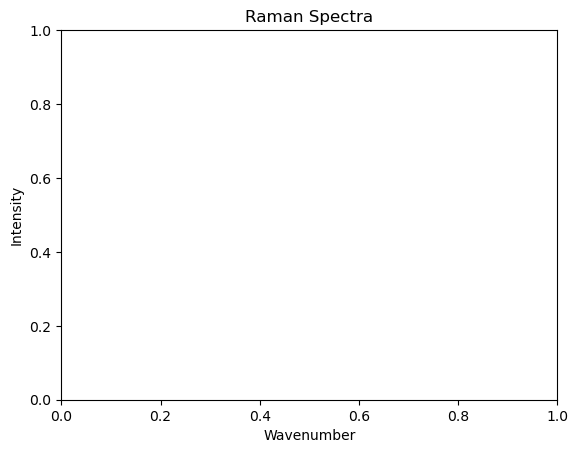

In [3]:
# Separate and plot spectra
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/kaggle/working/rolling_ball_spectrum_64371.csv')

# Find the indices where the value 1705.003906 is repeated
split_indices = data[data['X'].diff() > 0].index.tolist()

# Add the last index to include the last spectrum
split_indices.append(len(data))

# Create a list to store the separate spectra
spectra_list = []

# Iterate over the split indices to separate the spectra
for i in range(len(split_indices) - 1):
    start_index = split_indices[i]
    end_index = split_indices[i + 1]
    spectrum = data.iloc[start_index:end_index]
    spectra_list.append(spectrum)

# Plot each spectrum
for spectrum in spectra_list:
    plt.plot(spectrum['X'], spectrum['Y']) 

# Plotting
plt.xlabel('Wavenumber')
plt.ylabel('Intensity')
plt.title('Raman Spectra')
# Show the plot
plt.show()
